## Deep Learning Applied to Images - Feature Extraction

#### Prof. Thomas da Silva Paula

### Feature extraction example

* Using Keras
* Using the convolutional neural network Inception-v3

## Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

plt.rcParams['figure.figsize'] = [15, 5]

## Creating the model

```python
# Use model pretrained on ImageNet
weights='imagenet'

# Use the network without the final classification layer
include_top=False

# Indicated we would like to have an average pooling in the last layers
pooling='avg'

# Input shape. In this case, the image has 299px of height, 299px of width, and 3 channels.
input_shape=(299, 299, 3)
```

In [2]:
model = InceptionV3(weights='imagenet', include_top=False, pooling='avg', input_shape=(299, 299, 3))

In [3]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

### Feature extraction example

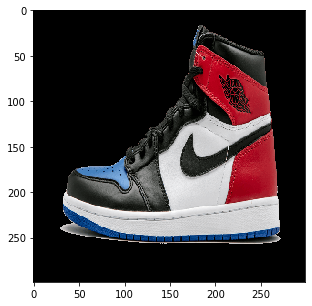

In [4]:
img_path = 'sample_images/sneakers.png'
img = image.load_img(img_path, target_size=(299, 299))
plt.imshow(img)

We need to prepare the image using the same preprocessing steps used to train the model. Fortunetly, Keras has methods to help us out.

In [5]:
x = image.img_to_array(img)
print(x.shape, x.dtype)
x = np.expand_dims(x, axis=0)
print(x.shape, x.dtype)
x = preprocess_input(x)

features = model.predict(x)

(299, 299, 3) float32
(1, 299, 299, 3) float32



Checking shape and type

In [6]:
print(features.shape, features.dtype)

(1, 2048) float32


Printing features

In [7]:
pprint(features)

array([[0.17176437, 0.29913104, 0.5031217 , ..., 0.11340574, 0.04080743,
        0.38091427]], dtype=float32)


### Using features for comparison

Image's features can be used for comparison. For example, we can compute the feautres of an image and compare with the features of other images, with the goal of retrieving the most similar ones.

In [8]:
def load_and_extract_features(model, img_path):
    # Loading RGBA to show the image properly
    img = image.load_img(img_path, color_mode='rgba')
    plt.imshow(img)
    
    # Loading RGB with expected input size
    img = image.load_img(img_path, target_size=(299, 299))
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    
    return features

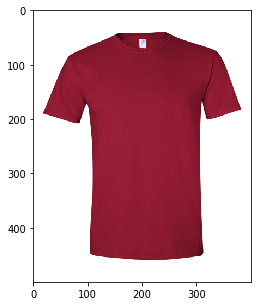

In [9]:
features_tshirt1 = load_and_extract_features(model, 'sample_images/tshirt.png')

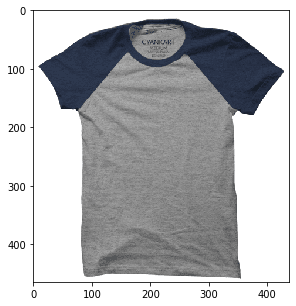

In [10]:
features_tshirt2 = load_and_extract_features(model, 'sample_images/tshirt2.png')

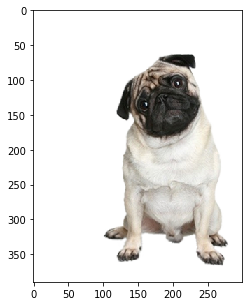

In [11]:
features_pug = load_and_extract_features(model, 'sample_images/pug.png')

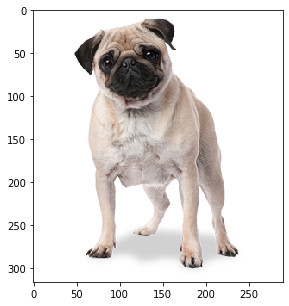

In [12]:
features_pug2 = load_and_extract_features(model, 'sample_images/pug2.png')

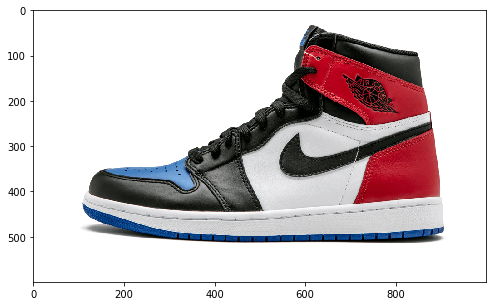

In [13]:
features_sneakers = load_and_extract_features(model, 'sample_images/sneakers.png')

### Computing distance between features
We can then compute the distance between these features and see whether given images are more similar to each other

In [14]:
from scipy.spatial.distance import cosine

#### T-shirt 1 vs Pug 1

In [15]:
distance = cosine(features_tshirt1, features_pug)
print(distance)

0.712799459695816


#### T-shirt 2 vs Pug 2

In [16]:
distance = cosine(features_tshirt2, features_pug2)
print(distance)

0.6621387302875519


#### Pug 1 vs Sneakers

In [17]:
distance = cosine(features_pug, features_sneakers)
print(distance)

0.573006808757782


In [18]:
distance = np.linalg.norm(features_pug - features_sneakers)
print(distance)

16.784641


#### T-shirt 1 vs T-shirt 2

In [19]:
distance = cosine(features_tshirt1, features_tshirt2)
print(distance)

0.09752964973449707


In [20]:
distance = np.linalg.norm(features_tshirt1 - features_tshirt2)
print(distance)

8.058087


#### Pug 1 vs Pug 2

In [21]:
distance = cosine(features_pug, features_pug2)
print(distance)

0.12385457754135132


In [22]:
distance = np.linalg.norm(features_pug - features_pug2)
print(distance)

8.068213


In [23]:
distance = cosine(features_pug, features_pug)
print(distance)

0.0


### We can also use features for other tasks
We'll see how it works in the assignment :)